In [3]:
df=pd.read_csv("C:/Users/Harsha1/Downloads/store-sales-time-series-forecasting (3)/train.csv")

In [69]:
#time :3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dftest=pd.read_csv("C:/Users/Harsha1/Downloads/store-sales-time-series-forecasting (3)/test.csv")

In [7]:
dfoil=pd.read_csv("C:/Users/Harsha1/Downloads/store-sales-time-series-forecasting (3)/oil.csv")

In [8]:
dfholidays_events=pd.read_csv("C:/Users/Harsha1/Downloads/store-sales-time-series-forecasting (3)/holidays_events.csv")

In [9]:
dftransactions=pd.read_csv("C:/Users/Harsha1/Downloads/store-sales-time-series-forecasting (3)/transactions.csv")

In [11]:
df.info(),dftest.info(),dfoil.info(),dfholidays_events.info(),dftransactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      -------

(None, None, None, None, None)

In [12]:
df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [32]:
df['store_nbr'].value_counts()

store_nbr
1     55572
46    55572
36    55572
37    55572
38    55572
39    55572
4     55572
40    55572
41    55572
42    55572
43    55572
44    55572
45    55572
47    55572
10    55572
48    55572
49    55572
5     55572
50    55572
51    55572
52    55572
53    55572
54    55572
6     55572
7     55572
8     55572
35    55572
34    55572
33    55572
32    55572
11    55572
12    55572
13    55572
14    55572
15    55572
16    55572
17    55572
18    55572
19    55572
2     55572
20    55572
21    55572
22    55572
23    55572
24    55572
25    55572
26    55572
27    55572
28    55572
29    55572
3     55572
30    55572
31    55572
9     55572
Name: count, dtype: int64

In [35]:
df["date"].sort_values()

0          2013-01-01
1194       2013-01-01
1193       2013-01-01
1192       2013-01-01
1191       2013-01-01
              ...    
2999693    2017-08-15
2999692    2017-08-15
2999691    2017-08-15
2999702    2017-08-15
3000887    2017-08-15
Name: date, Length: 3000888, dtype: object

In [43]:
(df.groupby('family')['sales'].sum()/55572).sort_values()

family
BOOKS                            0.115850
BABY CARE                        0.180864
HOME APPLIANCES                  0.748596
HARDWARE                         1.861909
MAGAZINES                        4.793043
SCHOOL AND OFFICE SUPPLIES       4.846254
BEAUTY                           6.080274
PET SUPPLIES                     6.416613
LAWN AND GARDEN                  9.876233
AUTOMOTIVE                       9.983841
PLAYERS AND ELECTRONICS         10.123947
LADIESWEAR                      11.717394
LINGERIE                        11.752573
CELEBRATION                     13.697132
HOME AND KITCHEN II             27.363960
HOME AND KITCHEN I              33.496923
GROCERY II                      35.319351
SEAFOOD                         36.267039
LIQUOR,WINE,BEER               139.398258
PREPARED FOODS                 158.351240
FROZEN FOODS                   253.255015
EGGS                           280.506298
HOME CARE                      288.324048
DELI                       

<Axes: xlabel='date', ylabel='sales'>

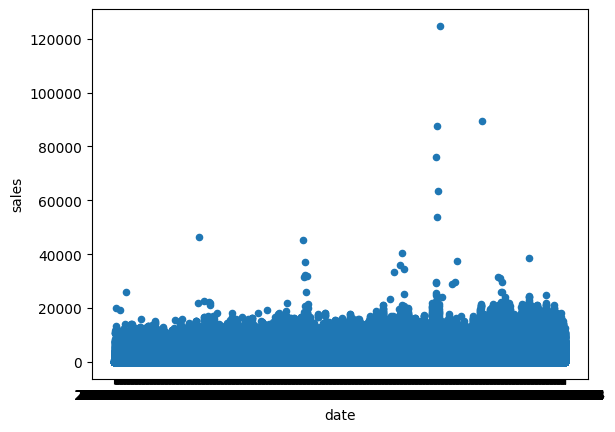

In [57]:
df.plot.scatter('date','sales')

In [64]:
c=df.groupby('date')['sales'].sum()

In [66]:
c


date
2013-01-01      2511.618999
2013-01-02    496092.417944
2013-01-03    361461.231124
2013-01-04    354459.677093
2013-01-05    477350.121229
                  ...      
2017-08-11    826373.722022
2017-08-12    792630.535079
2017-08-13    865639.677471
2017-08-14    760922.406081
2017-08-15    762661.935939
Name: sales, Length: 1684, dtype: float64

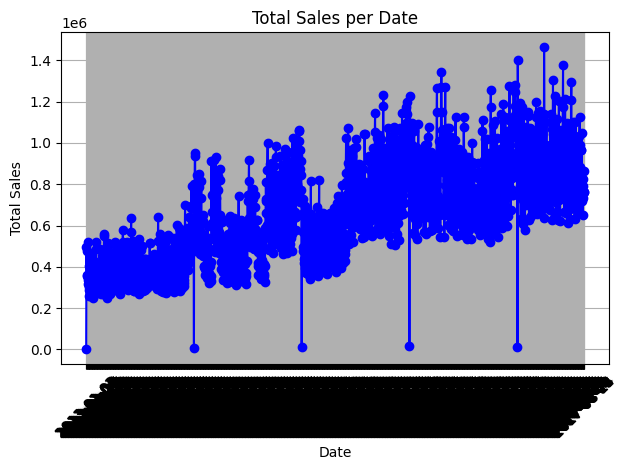

In [70]:



sales_per_date = df.groupby('date')['sales'].sum()



plt.plot(sales_per_date.index, sales_per_date.values, marker='o', linestyle='-', color='b')
plt.title('Total Sales per Date')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


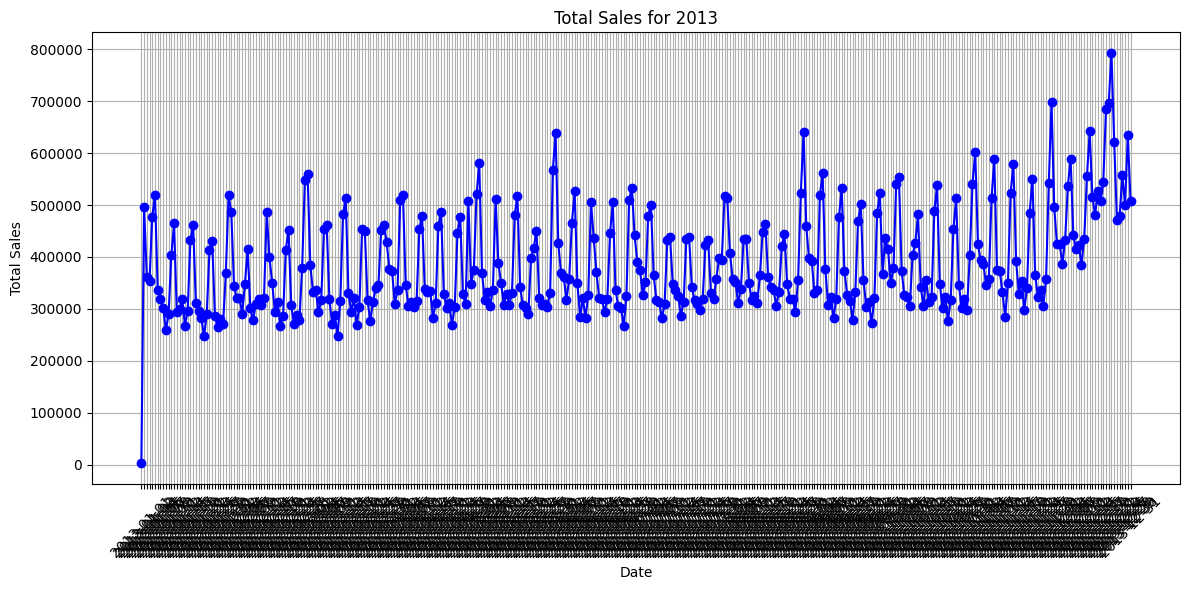

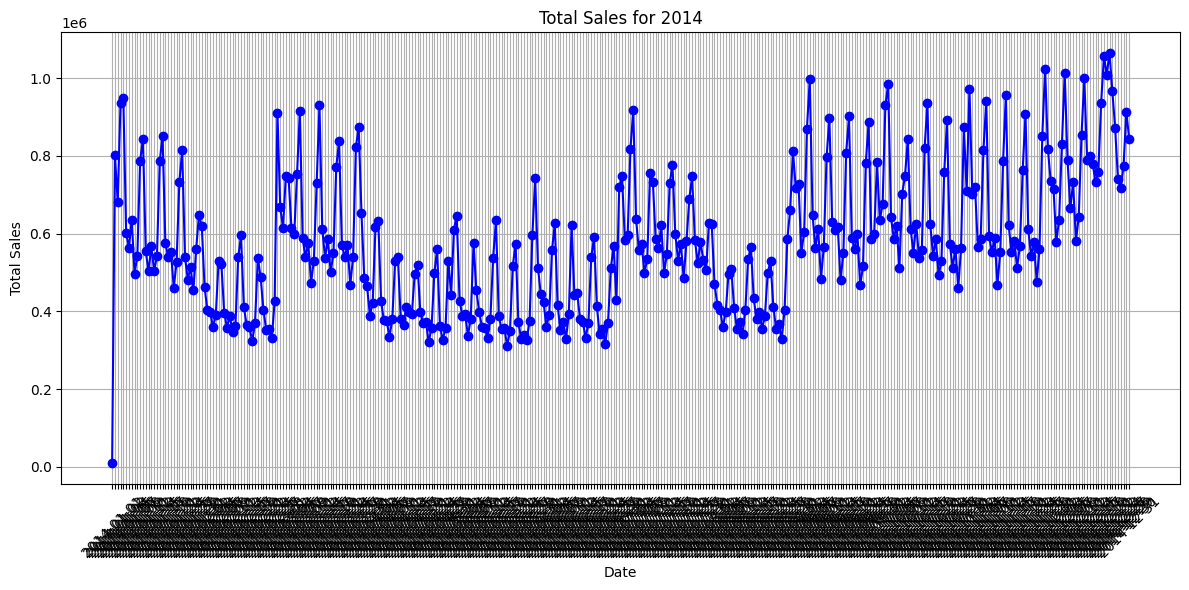

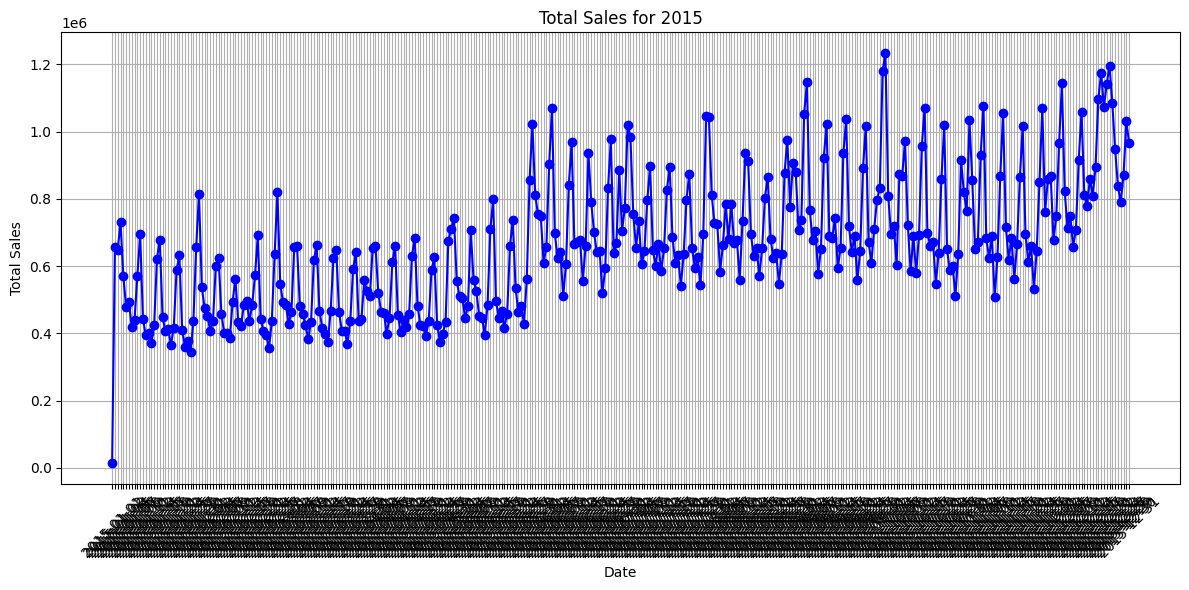

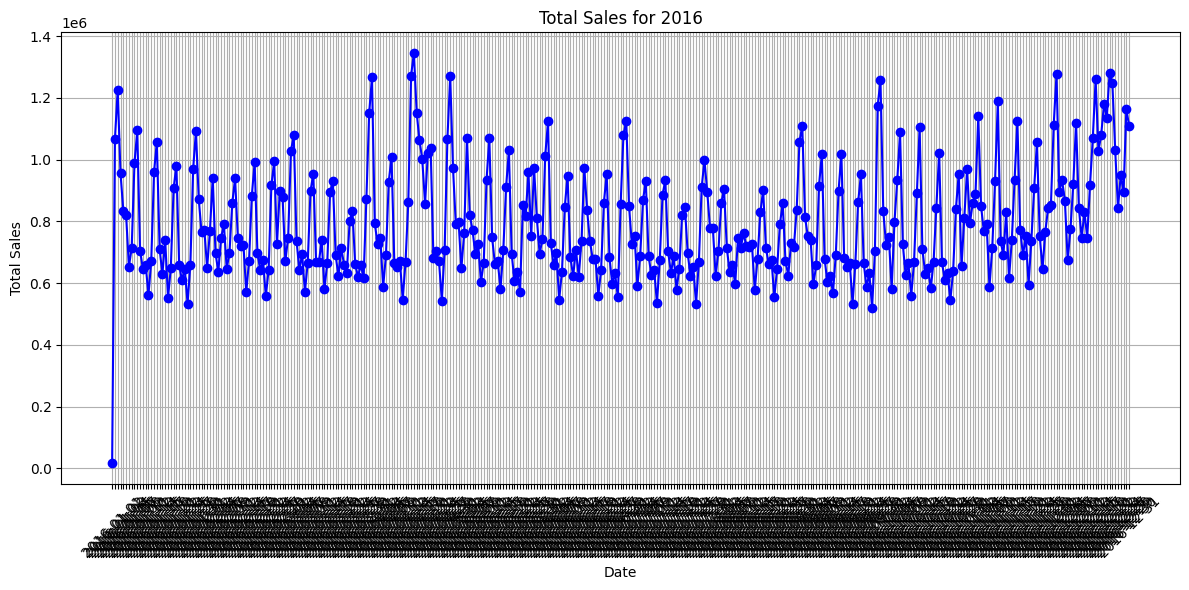

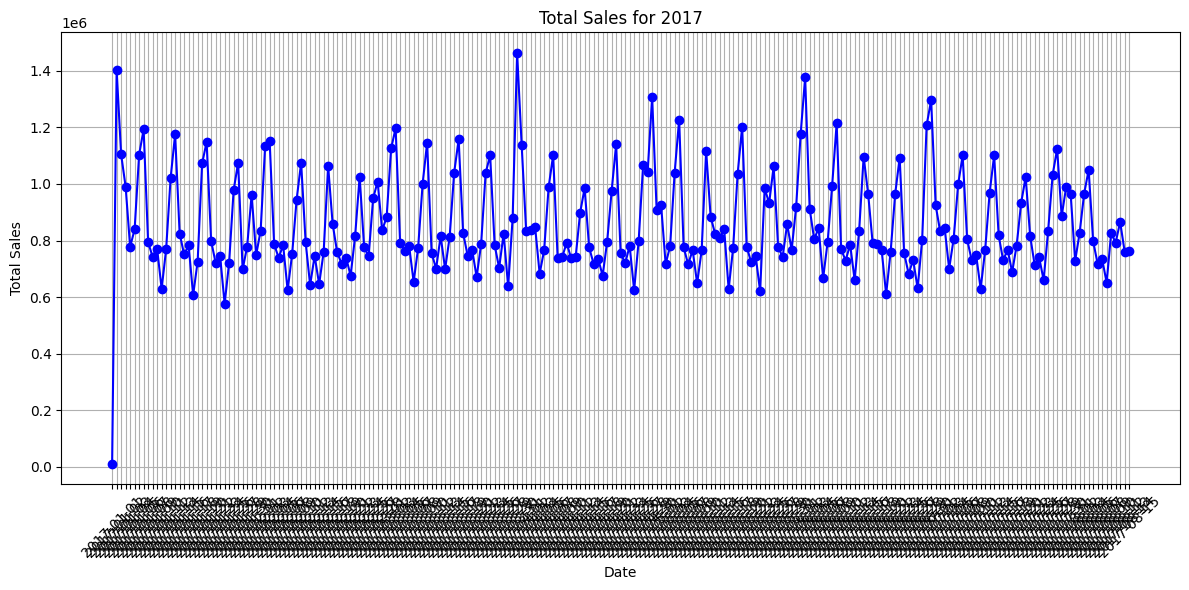

In [79]:
import pandas as pd
import matplotlib.pyplot as plt


year_to_plot = 2013
for i in range(5):
    df_filtered = df[df['date'].str.startswith(str(year_to_plot+i))]
    sales_per_date = df_filtered.groupby('date')['sales'].sum()



    plt.figure(figsize=(12, 6)) 
    plt.plot(sales_per_date.index, sales_per_date.values, marker='o', linestyle='-', color='b')
    plt.title(f'Total Sales for {year_to_plot+i}')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45) 
    plt.grid(True)
    plt.tight_layout()


    plt.show()


In [80]:
from statsmodels.tsa.stattools import adfuller

In [81]:
 adfuller(sales_per_date)


(-4.533949153806193,
 0.00017065449639417588,
 14,
 212,
 {'1%': -3.4615775784078466,
  '5%': -2.875271898983725,
  '10%': -2.5740891037735847},
 5458.850704894812)

In [91]:
(dfholidays_events['locale']=='National').sum()

174

In [98]:
 df.groupby('date')['sales'].sum()
sales_per_date_df = pd.DataFrame({'Date': sales_per_date.index, 'Total Sales': sales_per_date.values})

In [97]:
dfoil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [103]:
start_date = '2013-01-01' 
end_date = '2017-08-31'    
date_range = pd.date_range(start=start_date, end=end_date, freq='D')


missing_dates = date_range[~date_range.isin(dfoil['date'])]


print(missing_dates)
len(missing_dates)


DatetimeIndex(['2013-01-05', '2013-01-06', '2013-01-12', '2013-01-13',
               '2013-01-19', '2013-01-20', '2013-01-26', '2013-01-27',
               '2013-02-02', '2013-02-03',
               ...
               '2017-07-29', '2017-07-30', '2017-08-05', '2017-08-06',
               '2017-08-12', '2017-08-13', '2017-08-19', '2017-08-20',
               '2017-08-26', '2017-08-27'],
              dtype='datetime64[ns]', length=486, freq=None)


486